In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Read Toddler Autism dataset file from drive
df = pd.read_csv('/content/gdrive/My Drive/ResearchProject/Fadithabtah/Toddler Autism dataset July 2018.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
#drop unnecessary columns
df.drop(['Case_No','Who completed the test'], axis=1, inplace=True)


In [ ]:
print(df)

      A1  A2  A3  ...  Jaundice  Family_mem_with_ASD  Class/ASD Traits 
0      0   0   0  ...       yes                   no                 No
1      1   1   0  ...       yes                   no                Yes
2      1   0   0  ...       yes                   no                Yes
3      1   1   1  ...        no                   no                Yes
4      1   1   0  ...        no                  yes                Yes
...   ..  ..  ..  ...       ...                  ...                ...
1049   0   0   0  ...        no                  yes                 No
1050   0   0   1  ...       yes                   no                Yes
1051   1   0   1  ...       yes                   no                Yes
1052   1   0   0  ...        no                  yes                 No
1053   1   1   0  ...       yes                  yes                Yes

[1054 rows x 17 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


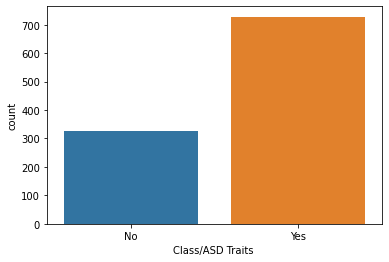

In [ ]:
#number of yes and no
sns.countplot(df['Class/ASD Traits '])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


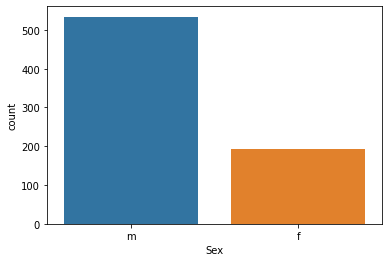

In [ ]:
#classified yes based on gender
df_yes = df[df['Class/ASD Traits ']=='Yes']
sns.countplot(df_yes['Sex'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

In [ ]:
#encode the categorical columns
encoder = LabelEncoder()
cols = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for i in cols:
    df[i] = encoder.fit_transform(df[i])
df.dtypes
df


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,0,5,0,1,0
1050,0,0,1,1,1,0,1,0,1,0,12,5,1,7,1,0,1
1051,1,0,1,1,1,1,1,1,1,1,18,9,1,8,1,0,1
1052,1,0,0,0,0,0,0,1,0,1,19,3,1,5,0,1,0


In [ ]:
X = df.drop(['Class/ASD Traits '], axis=1)
Y = df['Class/ASD Traits ']

##splitting dataset into train and test (70-30)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)



In [ ]:
#RandomForest model
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train, y_train.ravel())

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
#print(train_predict)
#print(test_predict)

tn, fp, fn, tp  = confusion_matrix(y_test, test_predict, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)
    
accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(fp+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fscore = 2*tp/(2*tp+fp+fn)

    
print(accuracy)
print(specificity)
print(precision)
print(recall)
print(fscore)



98 0 0 219
1.0
1.0
1.0
1.0
1.0


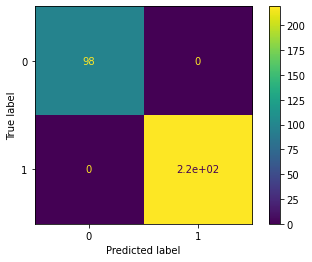

In [ ]:
plot_confusion_matrix(model, x_test, y_test)  

In [ ]:
# Logistic regression
model1 = LogisticRegression()
model1.fit(x_train, y_train.ravel())

#train_predict1 = model1.predict(x_train)
test_predict1 = model1.predict(x_test)
tn1, fp1, fn1, tp1  = confusion_matrix(y_test, test_predict1, labels=[0, 1]).ravel()
print(tn1, fp1, fn1, tp1)

accuracy1 = (tp1+tn1)/(tp1+tn1+fp1+fn1)
specificity1 = tn1/(fp1+tn1)
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
fscore1 = 2*tp1/(2*tp1+fp1+fn1)

print(accuracy1)
print(specificity1)
print(precision1)
print(recall1)
print(fscore1)


98 0 0 219
1.0
1.0
1.0
1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


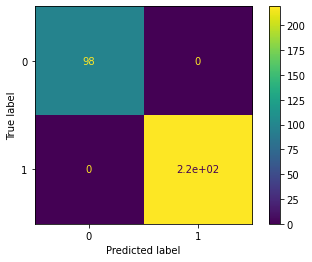

In [ ]:
plot_confusion_matrix(model1, x_test, y_test)  

In [ ]:
# Support vector machine (linear kernel)
model2 = LinearSVC()
model2.fit(x_train, y_train.ravel())

#train_predict2 = model2.predict(x_train)
test_predict2 = model2.predict(x_test)
tn2, fp2, fn2, tp2  = confusion_matrix(y_test, test_predict2, labels=[0, 1]).ravel()
print(tn2, fp2, fn2, tp2)

accuracy2 = (tp2+tn2)/(tp2+tn2+fp2+fn2)
specificity2 = tn2/(fp2+tn2)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
fscore2 = 2*tp2/(2*tp2+fp2+fn2)

print(accuracy2)
print(specificity2)
print(precision2)
print(recall2)
print(fscore2)


98 0 0 219
1.0
1.0
1.0
1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


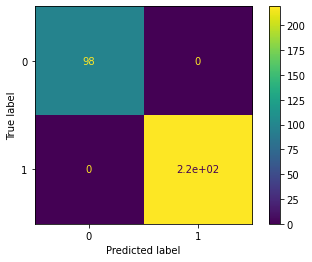

In [ ]:
plot_confusion_matrix(model2, x_test, y_test)  

In [ ]:
# Support vector machine (polynomial kernel)
model3 = SVC(kernel="poly")
model3.fit(x_train, y_train.ravel())

#train_predict3 = model3.predict(x_train)
test_predict3 = model3.predict(x_test)
tn3, fp3, fn3, tp3  = confusion_matrix(y_test, test_predict3, labels=[0, 1]).ravel()
print(tn3, fp3, fn3, tp3)

accuracy3 = (tp3+tn3)/(tp3+tn3+fp3+fn3)
specificity3 = tn3/(fp3+tn3)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
fscore3 = 2*tp3/(2*tp3+fp3+fn3)

print(accuracy3)
print(specificity3)
print(precision3)
print(recall3)
print(fscore3)

98 0 2 217
0.9936908517350158
1.0
1.0
0.9908675799086758
0.9954128440366973


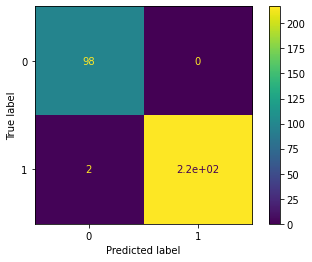

In [ ]:
plot_confusion_matrix(model3, x_test, y_test)  

In [ ]:
# K nearest neighbors
model4 = KNeighborsClassifier()
model4.fit(x_train, y_train.ravel())

#train_predict4 = model4.predict(x_train)
test_predict4 = model4.predict(x_test)
tn4, fp4, fn4, tp4  = confusion_matrix(y_test, test_predict4, labels=[0, 1]).ravel()
print(tn4, fp4, fn4, tp4)

accuracy4 = (tp4+tn4)/(tp4+tn4+fp4+fn4)
specificity4 = tn4/(fp4+tn4)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
fscore4 = 2*tp4/(2*tp4+fp4+fn4)

print(accuracy4)
print(specificity4)
print(precision4)
print(recall4)
print(fscore4)

97 1 8 211
0.9716088328075709
0.9897959183673469
0.9952830188679245
0.9634703196347032
0.9791183294663574


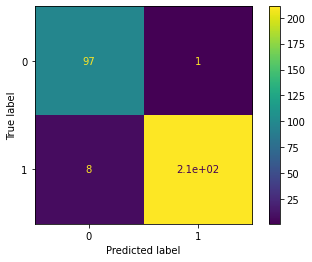

In [ ]:
plot_confusion_matrix(model4, x_test, y_test)  